# Superposed Epoch Analysis CMIP6 Historical model runs
- opens all the CMIP6 historical model run files with data on precipitation pr and surface temperature tas
- calculates monthly anomalies (based on 5-yr climatology) for 4 spatial regions (global, SH, Aus, E Aus) and 5 eruptions
- calculates percentiles (10, 90) to show model spread
- superposes the time-series for 5 eruptions plus mmm for tas and pr and different regions (superposed epoch analysis)

In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import seaborn as sns
import dask.diagnostics # dask allows you to check how long something is taking to load
import scipy

Matplotlib is building the font cache; this may take a moment.


In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

In [19]:
path = '/g/data/w48/kb6999/Models/SEA_data_for_plots/'
var = 'tas'
# var = 'pr'

In [20]:
# open all krakatoa eruption files/
K_llm_Glob = xr.open_dataset(f'{path}K_llm_Glob_{var}.nc')
K_llm_SH = xr.open_dataset(f'{path}K_llm_SH_{var}.nc')
K_llm_Aus = xr.open_dataset(f'{path}K_llm_Aus_{var}.nc')
K_llm_EA = xr.open_dataset(f'{path}K_llm_EA_{var}.nc')

In [21]:
# open all santa maria eruption files/
S_llm_Glob = xr.open_dataset(f'{path}S_llm_Glob_{var}.nc')
S_llm_SH = xr.open_dataset(f'{path}S_llm_SH_{var}.nc')
S_llm_Aus = xr.open_dataset(f'{path}S_llm_Aus_{var}.nc')
S_llm_EA = xr.open_dataset(f'{path}S_llm_EA_{var}.nc')

In [22]:
# open all agung eruption files/
A_llm_Glob = xr.open_dataset(f'{path}A_llm_Glob_{var}.nc')
A_llm_SH = xr.open_dataset(f'{path}A_llm_SH_{var}.nc')
A_llm_Aus = xr.open_dataset(f'{path}A_llm_Aus_{var}.nc')
A_llm_EA = xr.open_dataset(f'{path}A_llm_EA_{var}.nc')

In [23]:
# open all el chicon eruption files/
E_llm_Glob = xr.open_dataset(f'{path}E_llm_Glob_{var}.nc')
E_llm_SH = xr.open_dataset(f'{path}E_llm_SH_{var}.nc')
E_llm_Aus = xr.open_dataset(f'{path}E_llm_Aus_{var}.nc')
E_llm_EA = xr.open_dataset(f'{path}E_llm_EA_{var}.nc')

In [24]:
# open all pinatubo eruption files/
P_llm_Glob = xr.open_dataset(f'{path}P_llm_Glob_{var}.nc')
P_llm_SH = xr.open_dataset(f'{path}P_llm_SH_{var}.nc')
P_llm_Aus = xr.open_dataset(f'{path}P_llm_Aus_{var}.nc')
P_llm_EA = xr.open_dataset(f'{path}P_llm_EA_{var}.nc')

In [25]:
# # open all krakatoa eruption files/
# K_mmm_Glob = xr.open_dataset(f'{path}K_mmm_Glob_{var}.nc')
# K_mmm_SH = xr.open_dataset(f'{path}K_mmm_SH_{var}.nc')
# K_mmm_Aus = xr.open_dataset(f'{path}K_mmm_Aus_{var}.nc')
# K_mmm_EA = xr.open_dataset(f'{path}K_mmm_EA_{var}.nc')

In [26]:
# # open all krakatoa eruption files/
# S_mmm_Glob = xr.open_dataset(f'{path}S_mmm_Glob_{var}.nc')
# S_mmm_SH = xr.open_dataset(f'{path}S_mmm_SH_{var}.nc')
# S_mmm_Aus = xr.open_dataset(f'{path}S_mmm_Aus_{var}.nc')
# S_mmm_EA = xr.open_dataset(f'{path}S_mmm_EA_{var}.nc')

In [27]:
# # open all krakatoa eruption files/
# A_mmm_Glob = xr.open_dataset(f'{path}A_mmm_Glob_{var}.nc')
# A_mmm_SH = xr.open_dataset(f'{path}A_mmm_SH_{var}.nc')
# A_mmm_Aus = xr.open_dataset(f'{path}A_mmm_Aus_{var}.nc')
# A_mmm_EA = xr.open_dataset(f'{path}A_mmm_EA_{var}.nc')

In [28]:
# # open all krakatoa eruption files/
# E_mmm_Glob = xr.open_dataset(f'{path}E_mmm_Glob_{var}.nc')
# E_mmm_SH = xr.open_dataset(f'{path}E_mmm_SH_{var}.nc')
# E_mmm_Aus = xr.open_dataset(f'{path}E_mmm_Aus_{var}.nc')
# E_mmm_EA = xr.open_dataset(f'{path}E_mmm_EA_{var}.nc')

In [29]:
# # open all krakatoa eruption files/
# P_mmm_Glob = xr.open_dataset(f'{path}P_mmm_Glob_{var}.nc')
# P_mmm_SH = xr.open_dataset(f'{path}P_mmm_SH_{var}.nc')
# P_mmm_Aus = xr.open_dataset(f'{path}P_mmm_Aus_{var}.nc')
# P_mmm_EA = xr.open_dataset(f'{path}P_mmm_EA_{var}.nc')

In [30]:
# eruption names
volcanoes = ['Krakatoa', 'Santa Maria','Agung','El Chichon', 'Pinatubo']

In [31]:
def combine(K,S,A,E,P,names):
    """ Reset the time axis for data used in the superposed epoch analysis  
        
        Args:
        K (xarray): data set of first eruption 
        S (xarray): data set of second eruption 
        A (xarray): data set of third eruption 
        E (xarray): data set of fourth eruption 
        P (xarray): data set of fifth eruption 
        names (dict): dictionary of names for each of the five eruptions
    """
    import numpy as np
    import xarray as xr
    ds=[]
    ds.append(K)
    ds.append(S)
    ds.append(A)
    ds.append(E)
    ds.append(P)

    # store all eruptions in an array
    composite = xr.concat(ds, dim='volcano', coords = 'minimal')
    composite.coords['volcano'] = names
    
    return composite

### tas

In [32]:
# save tas files as composite
if var =='tas':
    composite_llm_Glob_tas = combine(K_llm_Glob, S_llm_Glob, A_llm_Glob, E_llm_Glob, P_llm_Glob, volcanoes)
    composite_llm_SH_tas = combine(K_llm_SH, S_llm_SH, A_llm_SH, E_llm_SH, P_llm_SH, volcanoes)
    composite_llm_Aus_tas = combine(K_llm_Aus, S_llm_Aus, A_llm_Aus, E_llm_Aus, P_llm_Aus, volcanoes)
    composite_llm_EA_tas = combine(K_llm_EA, S_llm_EA, A_llm_EA, E_llm_EA, P_llm_EA, volcanoes)
    print('var is tas')

var is tas


### pr

In [17]:
# save pr files as composite
if var == 'pr':
    composite_llm_Glob_pr = combine(K_llm_Glob, S_llm_Glob, A_llm_Glob, E_llm_Glob, P_llm_Glob, volcanoes)
    composite_llm_SH_pr = combine(K_llm_SH, S_llm_SH, A_llm_SH, E_llm_SH, P_llm_SH, volcanoes)
    composite_llm_Aus_pr = combine(K_llm_Aus, S_llm_Aus, A_llm_Aus, E_llm_Aus, P_llm_Aus, volcanoes)
    composite_llm_EA_pr = combine(K_llm_EA, S_llm_EA, A_llm_EA, E_llm_EA, P_llm_EA, volcanoes)
    print('var is pr')

var is pr


In [18]:
# # save tas files as composite
# composite_mmm_Glob_tas = combine(K_mmm_Glob, S_mmm_Glob, A_mmm_Glob, E_mmm_Glob, P_mmm_Glob, volcanoes)
# composite_mmm_SH_tas = combine(K_mmm_SH, S_mmm_SH, A_mmm_SH, E_mmm_SH, P_mmm_SH, volcanoes)
# composite_mmm_Aus_tas = combine(K_mmm_Aus, S_mmm_Aus, A_mmm_Aus, E_mmm_Aus, P_mmm_Aus, volcanoes)
# composite_mmm_EA_tas = combine(K_mmm_EA, S_mmm_EA, A_mmm_EA, E_mmm_EA, P_mmm_EA, volcanoes)

In [33]:
# combine tas and pr 
composite_llm_Glob = xr.Dataset({'tas': composite_llm_Glob_tas.tas, 'pr': composite_llm_Glob_pr.pr})
composite_llm_SH = xr.Dataset({'tas': composite_llm_SH_tas.tas, 'pr': composite_llm_SH_pr.pr})
composite_llm_Aus = xr.Dataset({'tas': composite_llm_Aus_tas.tas, 'pr': composite_llm_Aus_pr.pr})
composite_llm_EA = xr.Dataset({'tas': composite_llm_EA_tas.tas, 'pr': composite_llm_EA_pr.pr})

Right now I have all the models stored in one array so from hereafter I can calculate anomalies etc.  
## Select out regions and eruption dates

In [34]:
# take the composite over all volcanoes
composite_mmm_Glob = composite_llm_Glob.mean(dim='model')
composite_mmm_SH = composite_llm_SH.mean(dim='model')
composite_mmm_Aus = composite_llm_Aus.mean(dim='model')
composite_mmm_EA = composite_llm_EA.mean(dim='model')

In [35]:
# take the composite over all volcanoes
V_composite_mmm_Glob = composite_mmm_Glob.mean(dim='volcano')
V_composite_mmm_SH = composite_mmm_SH.mean(dim='volcano')
V_composite_mmm_Aus = composite_mmm_Aus.mean(dim='volcano')
V_composite_mmm_EA = composite_mmm_EA.mean(dim='volcano')

In [36]:
# calculate the percentiles and then take the mean along the model dimension for monthly anomalies
p10_Glob = composite_llm_Glob.chunk({'model': -1,'volcano': -1}).quantile(0.1, dim=['model', 'volcano'])
p10_SH = composite_llm_SH.chunk({'model': -1,'volcano': -1}).quantile(0.1, dim=['model', 'volcano'])
p10_Aus = composite_llm_Aus.chunk({'model': -1,'volcano': -1}).quantile(0.1, dim=['model', 'volcano'])
p10_EA = composite_llm_Aus.chunk({'model': -1,'volcano': -1}).quantile(0.1, dim=['model', 'volcano'])

p90_Glob = composite_llm_Glob.chunk({'model': -1,'volcano': -1}).quantile(0.9, dim=['model', 'volcano'])
p90_SH = composite_llm_SH.chunk({'model': -1,'volcano': -1}).quantile(0.9, dim=['model', 'volcano'])
p90_Aus = composite_llm_Aus.chunk({'model': -1,'volcano': -1}).quantile(0.9, dim=['model', 'volcano'])
p90_EA = composite_llm_EA.chunk({'model': -1,'volcano': -1}).quantile(0.9, dim=['model', 'volcano'])

In [37]:
p90_EA

<xarray.Dataset>
Dimensions:   (time: 121)
Coordinates:
  * time      (time) int64 -60 -59 -58 -57 -56 -55 -54 ... 54 55 56 57 58 59 60
    quantile  float64 0.9
Data variables:
    tas       (time) float64 dask.array<chunksize=(121,), meta=np.ndarray>
    pr        (time) float64 dask.array<chunksize=(121,), meta=np.ndarray>

In [38]:
# calculate the minimum value of the mmm for each spatial region
composite_min_mmm_Glob = V_composite_mmm_Glob.min()
composite_min_mmm_SH = V_composite_mmm_SH.min()
composite_min_mmm_Aus = V_composite_mmm_Aus.min()
composite_min_mmm_EA = V_composite_mmm_EA.min()

In [39]:
# print minimum values for composite as calculated above
print('Minimum value of composite temperature signal on each spatial scale is:\n Global:', 
      composite_min_mmm_Glob.tas.values.round(decimals=2), '\n SH:', 
      composite_min_mmm_SH.tas.values.round(decimals=2), '\n Aus:', 
      composite_min_mmm_Aus.tas.values.round(decimals=2), '\n EA:', 
      composite_min_mmm_EA.tas.values.round(decimals=2))
print('Minimum value of composite precipitation signal on each spatial scale is:\n Global:', 
      composite_min_mmm_Glob.pr.values.round(decimals=2), '\n SH:', 
      composite_min_mmm_SH.pr.values.round(decimals=2), '\n Aus:', 
      composite_min_mmm_Aus.pr.values.round(decimals=2), '\n EA:', 
      composite_min_mmm_EA.pr.values.round(decimals=2))

Minimum value of composite temperature signal on each spatial scale is:
 Global: -0.14 
 SH: -0.11 
 Aus: -0.37 
 EA: -0.31
Minimum value of composite precipitation signal on each spatial scale is:
 Global: -0.01 
 SH: -0.02 
 Aus: -0.19 
 EA: -0.16


In [40]:
# calculate the minimum value for Krakatoa in each spatial region
K_min_mmm_Glob = composite_mmm_Glob.sel(volcano='Krakatoa').min()
K_min_mmm_SH = composite_mmm_SH.sel(volcano='Krakatoa').min()
K_min_mmm_Aus = composite_mmm_Aus.sel(volcano='Krakatoa').min()
K_min_mmm_EA = composite_mmm_EA.sel(volcano='Krakatoa').min()

In [41]:
# print minimum values for Krakatoa as calculated above
print('Minimum value of composite temperature signal on each spatial scale is:\n Global:', 
      K_min_mmm_Glob.tas.values.round(decimals=2), '\n SH:', K_min_mmm_SH.tas.values.round(decimals=2), 
      '\n Aus:', K_min_mmm_Aus.tas.values.round(decimals=2), '\n EA:', K_min_mmm_EA.tas.values.round(decimals=2))
print('Minimum value of composite precipitation signal on each spatial scale is:\n Global:', 
      K_min_mmm_Glob.pr.values.round(decimals=2), '\n SH:', K_min_mmm_SH.pr.values.round(decimals=2), '\n Aus:', 
      K_min_mmm_Aus.pr.values.round(decimals=2), '\n EA:', K_min_mmm_EA.pr.values.round(decimals=2))

Minimum value of composite temperature signal on each spatial scale is:
 Global: -0.23 
 SH: -0.15 
 Aus: -0.56 
 EA: -0.48
Minimum value of composite precipitation signal on each spatial scale is:
 Global: -0.02 
 SH: -0.04 
 Aus: -0.36 
 EA: -0.35


# Figures

In [42]:
# set the default font size
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [43]:
blues = sns.color_palette("Blues_r")
greens = sns.color_palette("Greens_r")
reds = sns.color_palette("Reds_r")

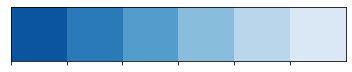

In [44]:
sns.palplot(sns.color_palette("Blues_r"))

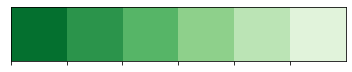

In [45]:
sns.palplot(sns.color_palette("Greens_r"))

In [46]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

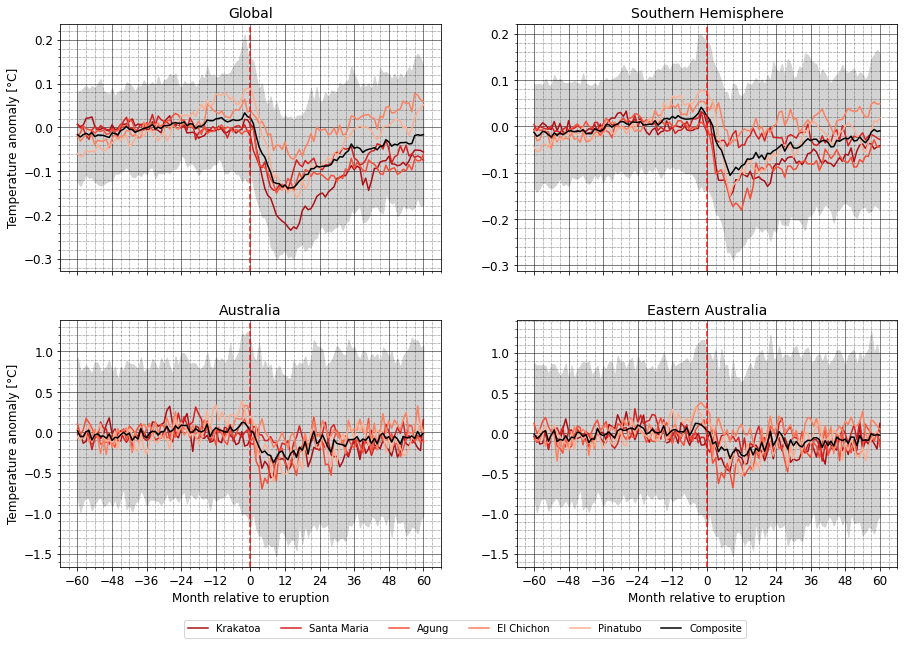

In [47]:
# plot monthly anomalies of temperature as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10))

# make subplots for each region
fplot.SEA_plots(composite_mmm_Glob.tas, V_composite_mmm_Glob.tas, p10_Glob.tas, p90_Glob.tas, reds, ax = axes[0,0])
fplot.SEA_plots(composite_mmm_SH.tas, V_composite_mmm_SH.tas, p10_SH.tas, p90_SH.tas, reds, ax = axes[0,1])
fplot.SEA_plots(composite_mmm_Aus.tas, V_composite_mmm_Aus.tas, p10_Aus.tas, p90_Aus.tas, reds, ax = axes[1,0])
fplot.SEA_plots(composite_mmm_EA.tas, V_composite_mmm_EA.tas, p10_EA.tas, p90_EA.tas, reds, ax = axes[1,1])

# set axis labels and subplot titles
axes[0,0].set(ylabel = f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(xlabel = 'Month relative to eruption', ylabel = f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[1,1].set(xlabel = 'Month relative to eruption', title = 'Eastern Australia')

handles, labels = axes[1, 1].get_legend_handles_labels()

# first arg to bbox is x second is y (x,y)
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), ncol=6) 

#fig.suptitle('Superposed epoch analysis of temperature anomalies for 5 major eruptions', size=16)

#fig.tight_layout() # if I include this line then titles overlap

plt.savefig('M_SEA_mon_tas.png', dpi=300, bbox_inches='tight')

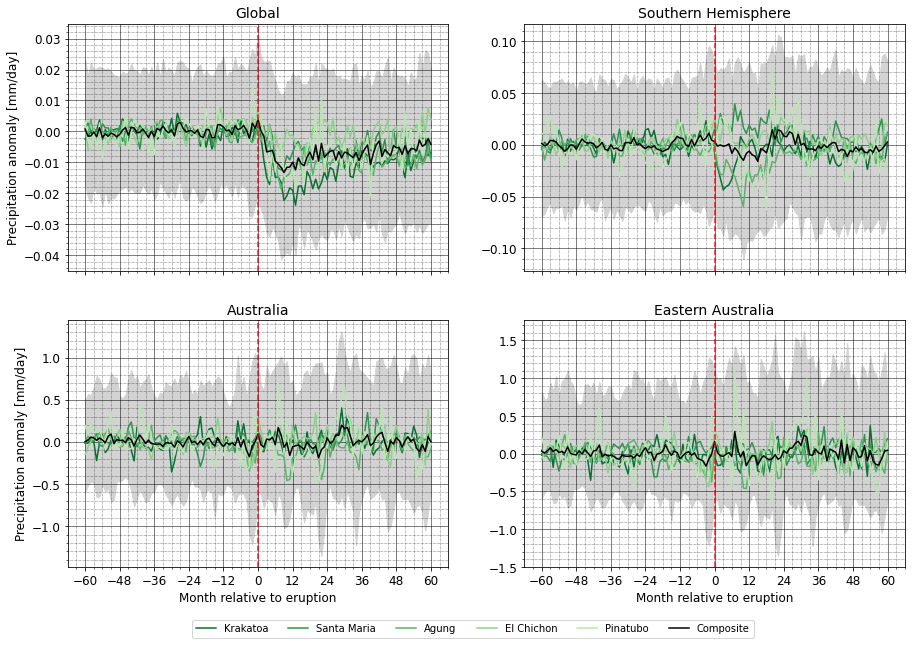

In [48]:
# plot monthly anomalies of precipitation as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10))

# make subplots for each region
fplot.SEA_plots(composite_mmm_Glob.pr, V_composite_mmm_Glob.pr, p10_Glob.pr, p90_Glob.pr, greens, ax = axes[0,0])
fplot.SEA_plots(composite_mmm_SH.pr, V_composite_mmm_SH.pr, p10_SH.pr, p90_SH.pr, greens, ax = axes[0,1])
fplot.SEA_plots(composite_mmm_Aus.pr, V_composite_mmm_Aus.pr, p10_Aus.pr, p90_Aus.pr, greens, ax = axes[1,0])
fplot.SEA_plots(composite_mmm_EA.pr, V_composite_mmm_EA.pr, p10_EA.pr, p90_EA.pr, greens, ax = axes[1,1])

#axes[0,0].set_xticks(np.arange(min(composite_mmm_Glob.time), max(composite_mmm_Glob.time)+1, 12))

# set axis labels and subplot titles
axes[0,0].set(ylabel = 'Precipitation anomaly [mm/day]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(ylabel = 'Precipitation anomaly [mm/day]', xlabel = 'Month relative to eruption', title = 'Australia')
axes[1,1].set(xlabel = 'Month relative to eruption', title = 'Eastern Australia')


handles, labels = axes[1, 1].get_legend_handles_labels()

# first arg to bbox is x second is y (x,y)
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), ncol=6) 

#fig.suptitle('Superposed epoch analysis of precipitation anomalies for 5 major eruptions', size=16)

#fig.tight_layout() # if I include this line then titles overlap

plt.savefig('M_SEA_mon_pr.png', dpi=300, bbox_inches='tight')

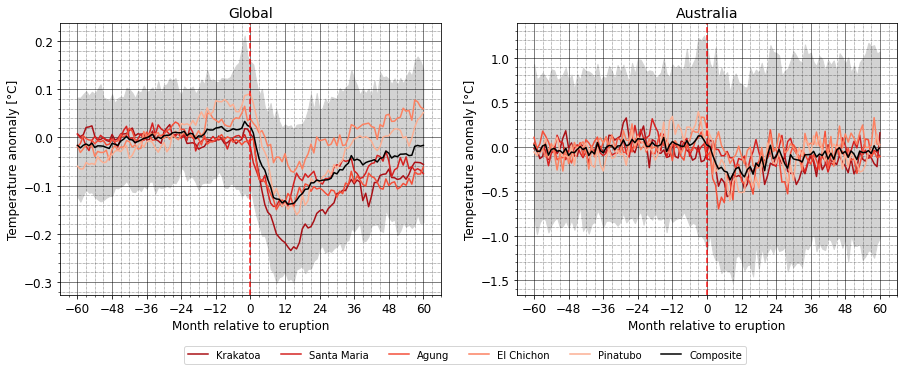

In [49]:
# plot monthly anomalies of temperature as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))

# make subplots for each region
fplot.SEA_plots(composite_mmm_Glob.tas, V_composite_mmm_Glob.tas, p10_Glob.tas, p90_Glob.tas, reds, ax = axes[0])
fplot.SEA_plots(composite_mmm_Aus.tas, V_composite_mmm_Aus.tas, p10_Aus.tas, p90_Aus.tas, reds, ax = axes[1])

#axes[0,0].set_xticks(np.arange(min(composite_mmm_Glob.time), max(composite_mmm_Glob.time)+1, 12))

# set axis labels and subplot titles
axes[0].set(xlabel = 'Month relative to eruption', ylabel = f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[1].set(xlabel = 'Month relative to eruption', ylabel = f'Temperature anomaly [{deg}C]', title = 'Australia')

handles, labels = axes[1].get_legend_handles_labels()

# first arg to bbox is x second is y (x,y)
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol=6) 

#fig.suptitle('Superposed epoch analysis of temperature anomalies for 5 major eruptions', size=16)

#fig.tight_layout() # if I include this line then titles overlap

plt.savefig('M_SEA_Glob&Aus_tas.png', dpi=300, bbox_inches='tight')

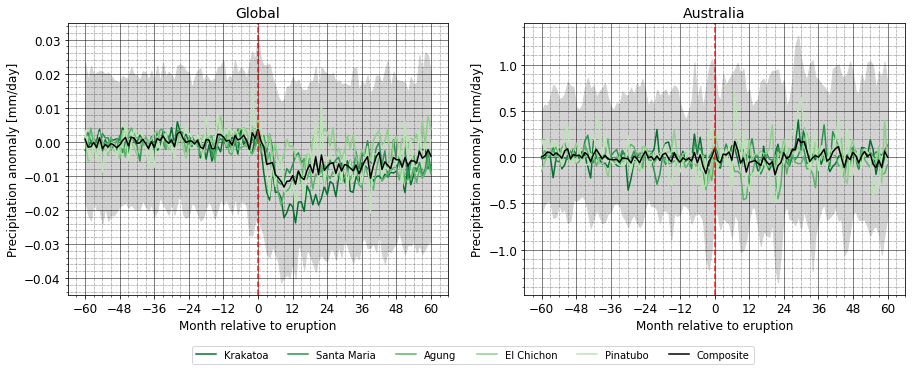

In [50]:
# plot monthly anomalies of precipitation as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))

# make subplots for each region
fplot.SEA_plots(composite_mmm_Glob.pr, V_composite_mmm_Glob.pr, p10_Glob.pr, p90_Glob.pr, greens, ax = axes[0])
fplot.SEA_plots(composite_mmm_Aus.pr, V_composite_mmm_Aus.pr, p10_Aus.pr, p90_Aus.pr, greens, ax = axes[1])

#axes[0,0].set_xticks(np.arange(min(composite_mmm_Glob.time), max(composite_mmm_Glob.time)+1, 12))

# set axis labels and subplot titles
axes[0].set(xlabel = 'Month relative to eruption', ylabel = 'Precipitation anomaly [mm/day]', title = 'Global') 
axes[1].set(xlabel = 'Month relative to eruption', ylabel = 'Precipitation anomaly [mm/day]', title = 'Australia')

handles, labels = axes[1].get_legend_handles_labels()

# first arg to bbox is x second is y (x,y)
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol=6) 

#fig.suptitle('Superposed epoch analysis of precipitation anomalies for 5 major eruptions', size=16)

#fig.tight_layout() # if I include this line then titles overlap

plt.savefig('M_SEA_Glob&Aus_pr.png', dpi=300, bbox_inches='tight')